# CTranslate2
CTranslate2是一个C++和Python库，用于使用Transformer模型进行高效推理

## 转换模型
```
pip install -qqq transformers ctranslate2  

# The model should be first converted into the CTranslate2 model format:
ct2-transformers-converter --model huggyllama/llama-13b --output_dir llama-13b-ct2 --force
```

## 查询实例

In [ ]:
import ctranslate2
import transformers

generator = ctranslate2.Generator("llama-13b-ct2", device="cuda", compute_type="float16")
tokenizer = transformers.AutoTokenizer.from_pretrained("huggyllama/llama-13b")

prompt = "Funniest joke ever:"
tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(prompt))
results = generator.generate_batch(
    [tokens], 
    sampling_topk=1, 
    max_length=200, 
)
tokens = results[0].sequences_ids[0]
output = tokenizer.decode(tokens)
print(output)

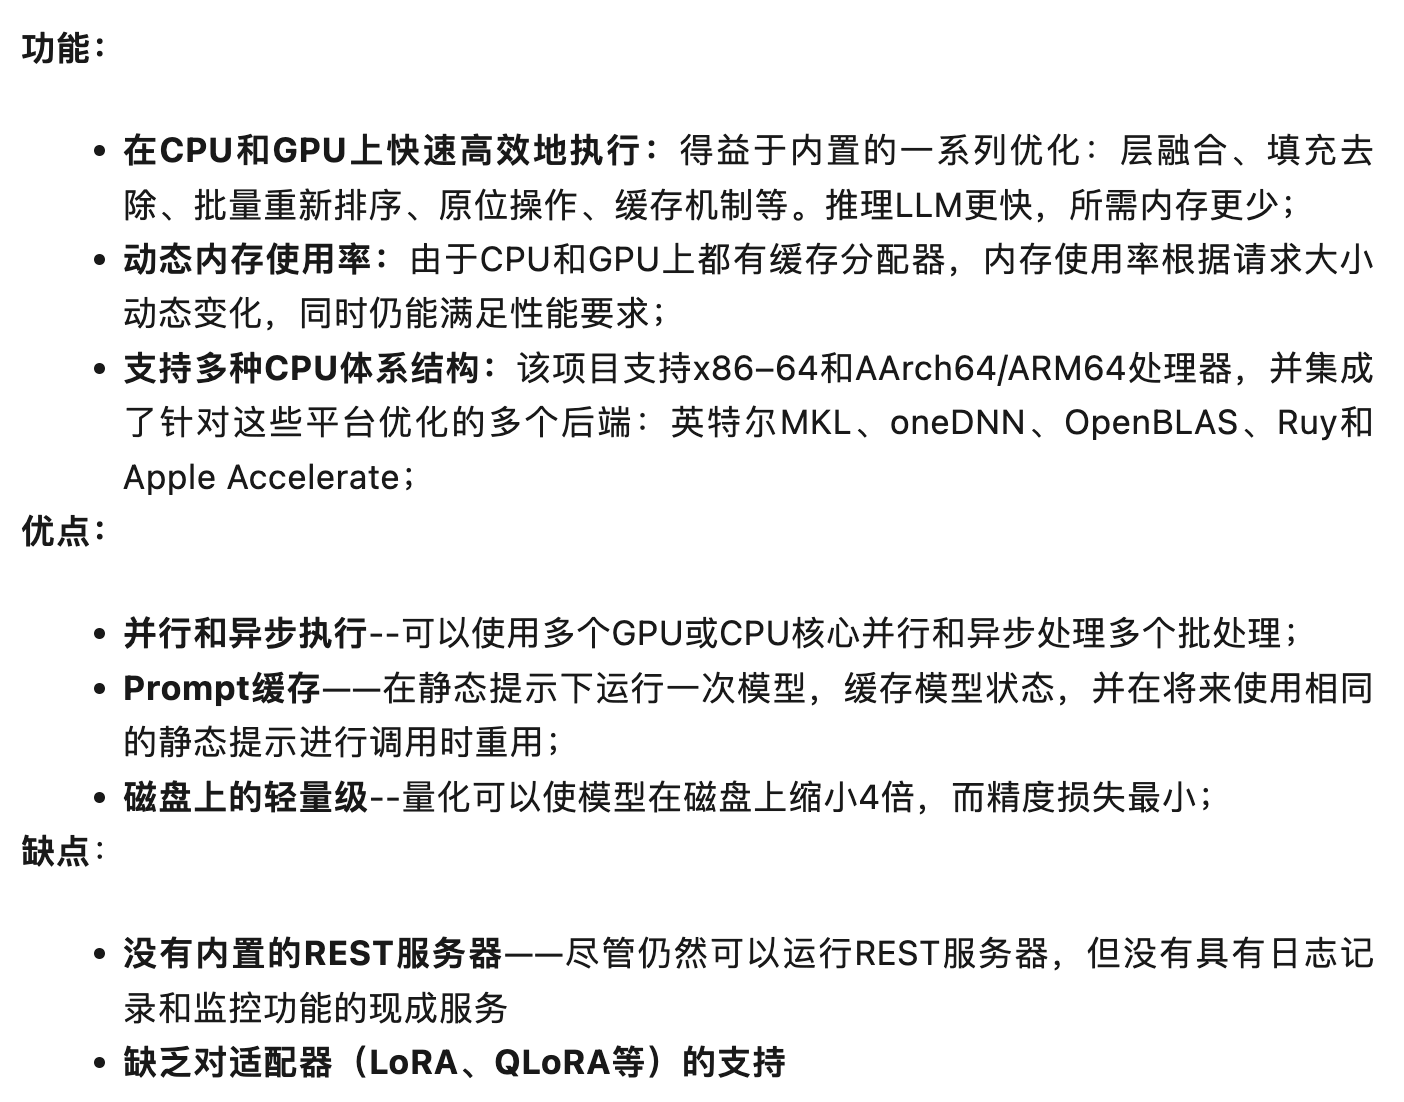